In [ ]:
install.packages("googledrive")
library(googledrive)
drive_auth()

In [ ]:
library(googledrive)
library(readxl)

folder <- drive_get(path = "chat_api/metrics_corr")

file_info <- list(
  gpt4turbo_en_results   = "gpt4turbo_en_results.xlsx",
  gpt4o_en_results       = "gpt4o_en_results.xlsx",
  gpt35turbo_en_results  = "gpt3_5_cmpre_results_en.xlsx",
  gemini_en_results      = "gemini_cmpre_en_results.xlsx",
  mistral_en_results     = "mistral_en_results.xlsx",
  llama_en_results       = "llama_en.xlsx",
  gpt4turbo_rus_results  = "gpt4turbo_rus_results.xlsx",
  gpt4o_rus_results      = "gpt4o_rus_results.xlsx",
  gpt35turbo_rus_results = "gpt3_5_cmpre_results_rus_new.xlsx",
  gemini_ru_results      = "gemini_cmpre_results_rus.xlsx",
  mistral_ru_results     = "mistral_ru_results.xlsx",
  llama_ru_results       = "llama_ru.xlsx"
)

load_excel_from_drive <- function(var_name, file_name, folder_id) {
  local_path <- file_name

  if (!file.exists(local_path)) {
    file <- drive_find(q = sprintf("name = '%s' and '%s' in parents", file_name, folder_id), n_max = 1)

    if (nrow(file) == 0) {
      stop(paste("File is not found in Drive:", file_name))
    }

    drive_download(file, path = local_path, overwrite = TRUE)
  }

  assign(var_name, read_excel(local_path), envir = .GlobalEnv)
}

invisible(mapply(load_excel_from_drive, names(file_info), file_info, MoreArgs = list(folder_id = folder$id)))

In [ ]:
en_gpt4turbo_bert_score_f1 <- mean(gpt4turbo_en_results$BERTScore_F1, na.rm = TRUE)
en_gpt4turbo_rouge1_f1   <- mean(gpt4turbo_en_results$ROUGE1_F1, na.rm = TRUE)
en_gpt4turbo_rouge2_f1   <- mean(gpt4turbo_en_results$ROUGE2_F1, na.rm = TRUE)

en_gpto_bert_score_f1    <- mean(gpt4o_en_results$BERTScore_F1, na.rm = TRUE)
en_gpto_rouge1_f1       <- mean(gpt4o_en_results$ROUGE1_F1, na.rm = TRUE)
en_gpto_rouge2_f1       <- mean(gpt4o_en_results$ROUGE2_F1, na.rm = TRUE)

en_gpt35turbo_bert_score_f1 <- mean(gpt35turbo_en_results$BERTScore_F1, na.rm = TRUE)
en_gpt35turbo_rouge1_f1   <- mean(gpt35turbo_en_results$ROUGE1_F1, na.rm = TRUE)
en_gpt35turbo_rouge2_f1   <- mean(gpt35turbo_en_results$ROUGE2_F1, na.rm = TRUE)

en_gemini_bert_score_f1  <- mean(gemini_en_results$BERTScore_F1, na.rm = TRUE)
en_gemini_rouge1_f1    <- mean(gemini_en_results$ROUGE1_F1, na.rm = TRUE)
en_gemini_rouge2_f1    <- mean(gemini_en_results$ROUGE2_F1, na.rm = TRUE)

en_mistral_bert_score_f1 <- mean(mistral_en_results$BERTScore_F1, na.rm = TRUE)
en_mistral_rouge1_f1   <- mean(mistral_en_results$ROUGE1_F1, na.rm = TRUE)
en_mistral_rouge2_f1   <- mean(mistral_en_results$ROUGE2_F1, na.rm = TRUE)

en_llama_bert_score_f1   <- mean(llama_en_results$BERTScore_F1, na.rm = TRUE)
en_llama_rouge1_f1     <- mean(llama_en_results$ROUGE1_F1, na.rm = TRUE)
en_llama_rouge2_f1     <- mean(llama_en_results$ROUGE2_F1, na.rm = TRUE)

rus_gpt4turbo_bert_score_f1 <- mean(gpt4turbo_rus_results$BERTScore_F1, na.rm = TRUE)
rus_gpt4turbo_rouge1_f1   <- mean(gpt4turbo_rus_results$ROUGE1_F1, na.rm = TRUE)
rus_gpt4turbo_rouge2_f1   <- mean(gpt4turbo_rus_results$ROUGE2_F1, na.rm = TRUE)

rus_gpto_bert_score_f1    <- mean(gpt4o_rus_results$BERTScore_F1, na.rm = TRUE)
rus_gpto_rouge1_f1       <- mean(gpt4o_rus_results$ROUGE1_F1, na.rm = TRUE)
rus_gpto_rouge2_f1       <- mean(gpt4o_rus_results$ROUGE2_F1, na.rm = TRUE)

rus_gpt35turbo_bert_score_f1 <- mean(gpt35turbo_rus_results$BERTScore_F1, na.rm = TRUE)
rus_gpt35turbo_rouge1_f1   <- mean(gpt35turbo_rus_results$ROUGE1_F1, na.rm = TRUE)
rus_gpt35turbo_rouge2_f1   <- mean(gpt35turbo_rus_results$ROUGE2_F1, na.rm = TRUE)

rus_gemini_bert_score_f1  <- mean(gemini_ru_results$BERTScore_F1, na.rm = TRUE)
rus_gemini_rouge1_f1    <- mean(gemini_ru_results$ROUGE1_F1, na.rm = TRUE)
rus_gemini_rouge2_f1    <- mean(gemini_ru_results$ROUGE2_F1, na.rm = TRUE)

rus_mistral_bert_score_f1 <- mean(mistral_ru_results$BERTScore_F1, na.rm = TRUE)
rus_mistral_rouge1_f1   <- mean(mistral_ru_results$ROUGE1_F1, na.rm = TRUE)
rus_mistral_rouge2_f1   <- mean(mistral_ru_results$ROUGE2_F1, na.rm = TRUE)

rus_llama_bert_score_f1   <- mean(llama_ru_results$BERTScore_F1, na.rm = TRUE)
rus_llama_rouge1_f1     <- mean(llama_ru_results$ROUGE1_F1, na.rm = TRUE)
rus_llama_rouge2_f1     <- mean(llama_ru_results$ROUGE2_F1, na.rm = TRUE)

df_metrics <- data.frame(
  Model = c("GPT-3.5Turbo", "GPT-4Turbo", "GPT-4o", "Gemini", "Mistral", "Llama"),
  `BERTScore F1 (English)` = c(en_gpt35turbo_bert_score_f1, en_gpt4turbo_bert_score_f1, en_gpto_bert_score_f1, en_gemini_bert_score_f1, en_mistral_bert_score_f1, en_llama_bert_score_f1),
  `BERTScore F1 (Russian)` = c(rus_gpt35turbo_bert_score_f1, rus_gpt4turbo_bert_score_f1, rus_gpto_bert_score_f1, rus_gemini_bert_score_f1, rus_mistral_bert_score_f1, rus_llama_bert_score_f1),
  `ROUGE1 F1 (English)` = c(en_gpt35turbo_rouge1_f1, en_gpt4turbo_rouge1_f1, en_gpto_rouge1_f1, en_gemini_rouge1_f1, en_mistral_rouge1_f1, en_llama_rouge1_f1),
  `ROUGE1 F1 (Russian)` = c(rus_gpt35turbo_rouge1_f1, rus_gpt4turbo_rouge1_f1, rus_gpto_rouge1_f1, rus_gemini_rouge1_f1, rus_mistral_rouge1_f1, rus_llama_rouge1_f1),
  `ROUGE2 F1 (English)` = c(en_gpt35turbo_rouge2_f1, en_gpt4turbo_rouge2_f1, en_gpto_rouge2_f1, en_gemini_rouge2_f1, en_mistral_rouge2_f1, en_llama_rouge2_f1),
  `ROUGE2 F1 (Russian)` = c(rus_gpt35turbo_rouge2_f1, rus_gpt4turbo_rouge2_f1, rus_gpto_rouge2_f1, rus_gemini_rouge2_f1, rus_mistral_rouge2_f1, rus_llama_rouge2_f1)
)

rownames(df_metrics) <- df_metrics$Model

print(head(df_metrics))

                    Model BERTScore.F1..English. BERTScore.F1..Russian.
GPT-3.5Turbo GPT-3.5Turbo              0.8495901              0.7155512
GPT-4Turbo     GPT-4Turbo              0.8378689              0.7028736
GPT-4o             GPT-4o              0.8381357              0.6982074
Gemini             Gemini              0.8468277              0.7277598
Mistral           Mistral              0.8446551              0.7054050
Llama               Llama              0.8446073              0.7023598
             ROUGE1.F1..English. ROUGE1.F1..Russian. ROUGE2.F1..English.
GPT-3.5Turbo           0.3264932           0.4548318           0.1312540
GPT-4Turbo             0.2960342           0.4459714           0.1256072
GPT-4o                 0.2857952           0.4454684           0.1248066
Gemini                 0.3210610           0.5072308           0.1354542
Mistral                0.2767721           0.4330200           0.1168079
Llama                  0.2733084           0.4668002      

In [ ]:
en_gpt4turbo_bert_score_f1 = gpt4turbo_en_results['BERTScore_F1'].mean()
en_gpt4turbo_rouge1_f1 = gpt4turbo_en_results['ROUGE1_F1'].mean()
en_gpt4turbo_rouge2_f1 = gpt4turbo_en_results['ROUGE2_F1'].mean()

en_gpto_bert_score_f1 = gpt4o_en_results['BERTScore_F1'].mean()
en_gpto_rouge1_f1 = gpt4o_en_results['ROUGE1_F1'].mean()
en_gpto_rouge2_f1 = gpt4o_en_results['ROUGE2_F1'].mean()

en_gpt35turbo_bert_score_f1 = gpt35turbo_en_results['BERTScore_F1'].mean()
en_gpt35turbo_rouge1_f1 = gpt35turbo_en_results['ROUGE1_F1'].mean()
en_gpt35turbo_rouge2_f1 = gpt35turbo_en_results['ROUGE2_F1'].mean()

en_gemini_bert_score_f1 = gemini_en_results['BERTScore_F1'].mean()
en_gemini_rouge1_f1 = gemini_en_results['ROUGE1_F1'].mean()
en_gemini_rouge2_f1 = gemini_en_results['ROUGE2_F1'].mean()

en_mistral_bert_score_f1 = mistral_en_results['BERTScore_F1'].mean()
en_mistral_rouge1_f1 = mistral_en_results['ROUGE1_F1'].mean()
en_mistral_rouge2_f1 = mistral_en_results['ROUGE2_F1'].mean()

en_llama_bert_score_f1 = llama_en_results['BERTScore_F1'].mean()
en_llama_rouge1_f1 = llama_en_results['ROUGE1_F1'].mean()
en_llama_rouge2_f1 = llama_en_results['ROUGE2_F1'].mean()


rus_gpt4turbo_bert_score_f1 = gpt4turbo_rus_results['BERTScore_F1'].mean()
rus_gpt4turbo_rouge1_f1 = gpt4turbo_rus_results['ROUGE1_F1'].mean()
rus_gpt4turbo_rouge2_f1 = gpt4turbo_rus_results['ROUGE2_F1'].mean()

rus_gpto_bert_score_f1 = gpt4o_rus_results['BERTScore_F1'].mean()
rus_gpto_rouge1_f1 = gpt4o_rus_results['ROUGE1_F1'].mean()
rus_gpto_rouge2_f1 = gpt4o_rus_results['ROUGE2_F1'].mean()

rus_gpt35turbo_bert_score_f1 = gpt35turbo_rus_results['BERTScore_F1'].mean()
rus_gpt35turbo_rouge1_f1 = gpt35turbo_rus_results['ROUGE1_F1'].mean()
rus_gpt35turbo_rouge2_f1 = gpt35turbo_rus_results['ROUGE2_F1'].mean()

rus_gemini_bert_score_f1 = gemini_ru_results['BERTScore_F1'].mean()
rus_gemini_rouge1_f1 = gemini_ru_results['ROUGE1_F1'].mean()
rus_gemini_rouge2_f1 = gemini_ru_results['ROUGE2_F1'].mean()

rus_mistral_bert_score_f1 = mistral_ru_results['BERTScore_F1'].mean()
rus_mistral_rouge1_f1 = mistral_ru_results['ROUGE1_F1'].mean()
rus_mistral_rouge2_f1 = mistral_ru_results['ROUGE2_F1'].mean()

rus_llama_bert_score_f1 = llama_ru_results['BERTScore_F1'].mean()
rus_llama_rouge1_f1 = llama_ru_results['ROUGE1_F1'].mean()
rus_llama_rouge2_f1 = llama_ru_results['ROUGE2_F1'].mean()

ERROR: Error in parse(text = input): <text>:1:66: unexpected symbol
1: en_gpt4turbo_bert_score_f1 = gpt4turbo_en_results['BERTScore_F1'].mean
                                                                     ^


In [ ]:
install.packages(c("tidyverse", "ggthemes", "gridExtra", "cowplot"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages(c("plotly", "dplyr", "sf", "ggrepel", "ggplot2"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘lazyeval’, ‘crosstalk’, ‘classInt’, ‘s2’, ‘units’




## **Error distributions' radar-plot**

In [ ]:
install.packages("pandoc")

In [ ]:
library(plotly)

theta <- c(
  "a", "b", "c", "d", "e", "f", "g",
  "a"
)

data_list <- list(
  "gpt3_5_en" = c(92/100, 63/100, 60/100, 17/100, 46/100, 58/100, 14/100),
  "gpt3_5_ru" = c(326/419, 265/419, 191/419, 45/419, 245/419, 184/419, 60/419),

  "gpt4o_en" = c(143/172, 63/172, 58/172, 20/172, 44/172, 92/172, 48/172),
  "gpt4o_ru" = c(152/176, 75/176, 85/176, 20/176, 61/176, 98/176, 44/176),

  "llama_en" = c(201/211, 114/211, 155/211, 32/211, 71/211, 105/211, 121/211),
  "llama_ru" = c(195/207, 107/207, 111/207, 14/207, 70/207, 73/207, 101/207),

  "gpt4turbo_en" = c(158/189, 97/189, 105/189, 34/189, 55/189, 103/189, 50/189),
  "gpt4turbo_ru" = c(262/372, 141/372, 88/372, 32/372, 134/372, 81/372, 118/372),

  "gemini_en" = c(122/150, 69/150, 82/150, 18/150, 33/150, 86/150, 40/150),
  "gemini_ru" = c(213/269, 124/269, 90/269, 45/269, 87/269, 73/269, 82/269),

  "mistral_en" = c(341/386, 238/386, 228/386, 50/386, 158/386, 242/386, 110/386),
  "mistral_ru" = c(350/405, 267/405, 240/405, 61/405, 193/405, 204/405, 118/405)
)

for (m in names(data_list)) {
  data_list[[m]] <- c(data_list[[m]], data_list[[m]][1])
}

en_models <- c("gpt3_5_en", "gpt4o_en", "llama_en",
               "gpt4turbo_en", "gemini_en", "mistral_en")
ru_models <- c("gpt3_5_ru", "gpt4o_ru", "llama_ru",
               "gpt4turbo_ru", "gemini_ru", "mistral_ru")

base_colors <- c(
  "gpt3_5"    = "#1f77b4",
  "gpt4o"     = "#ff7f0e",
  "llama"     = "#2ca02c",
  "gpt4turbo" = "#d62728",
  "gemini"    = "#9467bd",
  "mistral"   = "#8c564b"
)

get_group_name <- function(model_name) {
  sub("_en$", "", sub("_ru$", "", model_name))
}

alpha_color <- function(hex_color) {
  paste0(substr(hex_color, 1, 7), "33")
}

make_radar_plot <- function(models, title_text) {

  p <- plot_ly(type = 'scatterpolar', mode = 'lines+markers', fill = 'toself')

  for (m in models) {
    group_name <- get_group_name(m)
    base_col <- base_colors[group_name]

    p <- p %>% add_trace(
      r = data_list[[m]],
      theta = theta,
      name = m,
      line = list(color = base_col, width = 2, shape = 'spline'),
      fillcolor = alpha_color(base_col),
      marker = list(
        symbol = 'circle',
        size = 6,
        color = 'white',
        line = list(color = base_col, width = 2)
      )
    )
  }

  p <- p %>% layout(
    title = title_text,
    polar = list(
      radialaxis = list(
        range = c(0, 1),
        tickmode = "array",
        tickvals = c(0, 0.2, 0.4, 0.6, 0.8),
        ticktext = c("0", "0.2", "0.4", "0.6", "0.8"),
        showgrid = TRUE,
        showline = TRUE,
        linecolor = "black",
        linewidth = 2
      ),
      angularaxis = list(
        tickfont = list(size = 14)
      ),
      bgcolor = "white"
    ),
    paper_bgcolor = "white",
    font = list(size = 14)
  )

  return(p)
}

fig_en <- make_radar_plot(en_models, "Error distibution (EN)")
fig_ru <- make_radar_plot(ru_models, "Error distibution (RU)")

fig_combined <- subplot(fig_en, fig_ru, nrows = 1, shareY = FALSE, shareX = FALSE)
htmlwidgets::saveWidget(fig_en, "err_radar_plot_en.html")
htmlwidgets::saveWidget(fig_ru, "err_radar_plot_ru.html")

## **Average number of tokens by LLM and language**

In [ ]:
install.packages("remotes")
remotes::install_github("hrbrmstr/ggchicklet")

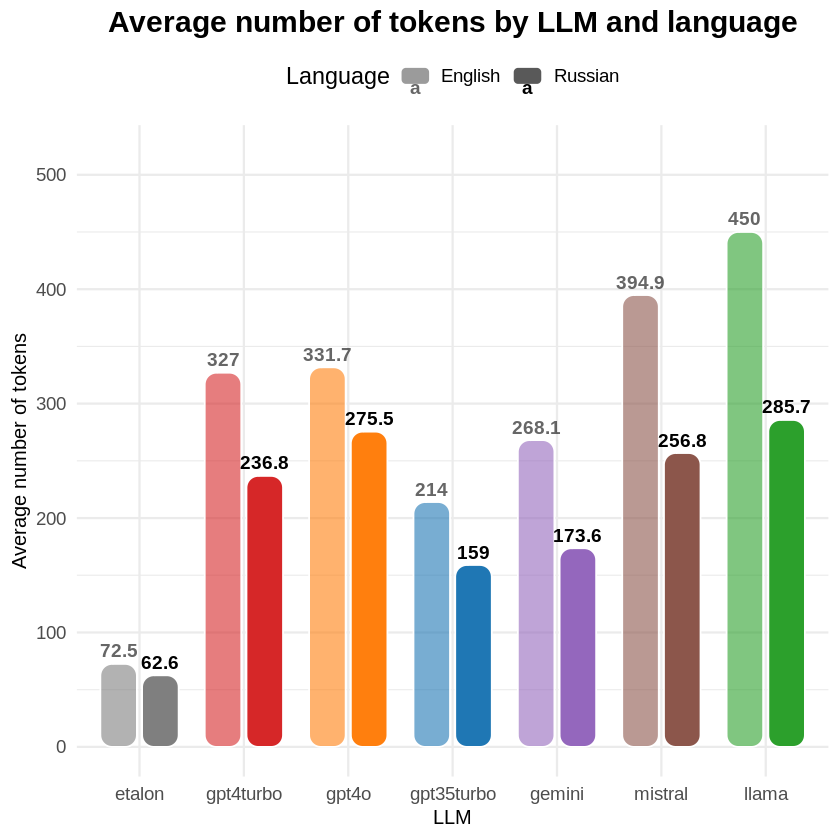

In [ ]:
library(ggplot2)
library(dplyr)
library(ggchicklet)

df <- data.frame(
  Model = rep(c("etalon", "gpt4turbo", "gpt4o", "gpt35turbo", "gemini", "mistral", "llama"), each = 2),
  Language = rep(c("English", "Russian"), times = 7),
  AverageTokens = c(
    72.53, 62.58,
    327.02, 236.82,
    331.73, 275.52,
    213.99, 158.97,
    268.13, 173.61,
    394.90, 256.82,
    450.01, 285.73
  )
)

df$Model <- factor(df$Model, levels = c("etalon", "gpt4turbo", "gpt4o", "gpt35turbo", "gemini", "mistral", "llama"))

model_colors <- c(
  "etalon"     = "#7f7f7f",
  "gpt4turbo"  = "#d62728",
  "gpt4o"      = "#ff7f0e",
  "gpt35turbo" = "#1f77b4",
  "gemini"     = "#9467bd",
  "mistral"    = "#8c564b",
  "llama"      = "#2ca02c"
)

p <- ggplot(df, aes(x = Model, y = AverageTokens, fill = Model, alpha = Language)) +
  geom_chicklet(
    position = position_dodge(width = 0.8),
    width = 0.7,
    radius = grid::unit(7, "pt")
  ) +
  geom_text(aes(label = round(AverageTokens, 1), group = Language),
            position = position_dodge(width = 0.8),
            vjust = -0.5, size = 4, fontface = "bold") +
  labs(title = "Average number of tokens by LLM and language",
       x = "LLM",
       y = "Average number of tokens") +
  scale_fill_manual(values = model_colors, guide = FALSE) +
  scale_alpha_manual(values = c("English" = 0.6, "Russian" = 1)) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18),
    axis.title = element_text(size = 12),
    legend.position = "top"
  ) +
  ylim(0, max(df$AverageTokens) * 1.15)

print(p)

## **Error distribution by section**

In [ ]:
if (!require("remotes")) {
  install.packages("remotes")
  library(remotes)
}

remotes::install_github("hrbrmstr/ggchicklet")

library(ggchicklet)

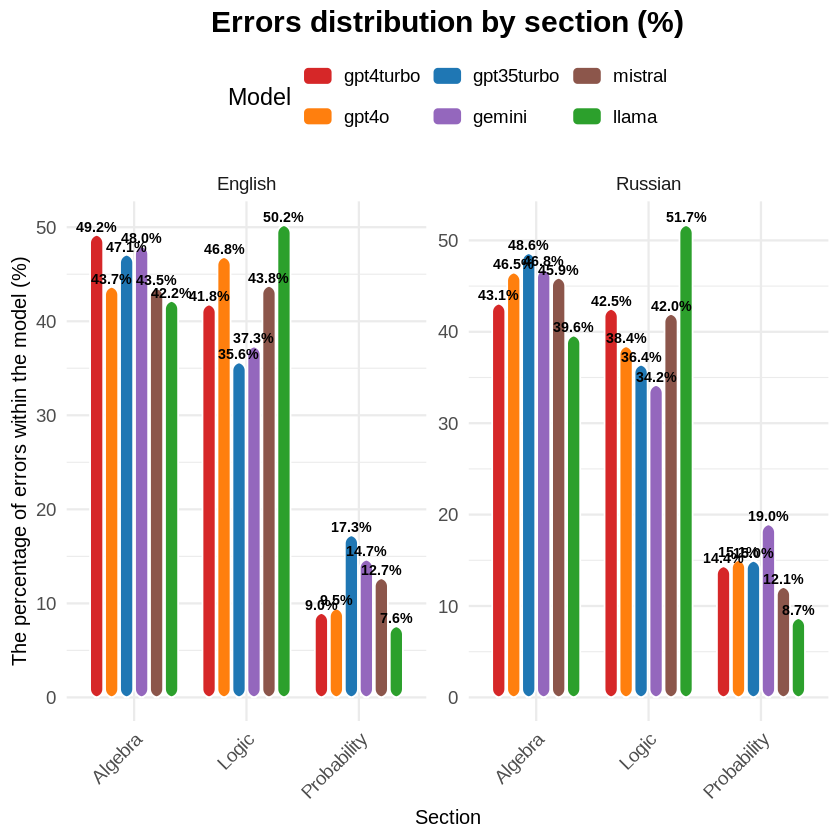

In [9]:
library(ggplot2)
library(dplyr)
library(ggchicklet)

load_data <- function(model, lang, file_path) {
  df <- read.csv(file_path)

  if (lang == "Russian") {
    df$section <- recode(df$section,
                         "Алгебра" = "Algebra",
                         "Логика" = "Logic",
                         "Вероятность" = "Probability")
  }

  df %>%
    count(section, name = "Errors") %>%
    mutate(Model = model, Language = lang)
}

df <- bind_rows(
  load_data("gpt4turbo", "English", "onlywrong_gpt4turbo_en.csv"),
  load_data("gpt4turbo", "Russian", "onlywrong_gpt4turbo_ru.csv"),
  load_data("gpt4o", "English", "onlywrong_gpt4o_en.csv"),
  load_data("gpt4o", "Russian", "onlywrong_gpt4o_ru.csv"),
  load_data("gpt35turbo", "English", "onlywrong_gpt35_en.csv"),
  load_data("gpt35turbo", "Russian", "onlywrong_gpt35_ru.csv"),
  load_data("gemini", "English", "onlywrong_gemini_en.csv"),
  load_data("gemini", "Russian", "onlywrong_gemini_ru.csv"),
  load_data("llama", "English", "onlywrong_llama_en.csv"),
  load_data("llama", "Russian", "onlywrong_llama_ru.csv"),
  load_data("mistral", "English", "onlywrong_mistral_en.csv"),
  load_data("mistral", "Russian", "onlywrong_mistral_ru.csv")
)

df <- df %>%
  group_by(Model, Language) %>%
  mutate(TotalErrors = sum(Errors)) %>%
  ungroup()

df <- df %>%
  mutate(Percent = (Errors / TotalErrors) * 100)

df$Model <- factor(df$Model, levels = c("gpt4turbo", "gpt4o", "gpt35turbo", "gemini", "mistral", "llama"))

model_colors <- c(
  "gpt4turbo"  = "#d62728",
  "gpt4o"      = "#ff7f0e",
  "gpt35turbo" = "#1f77b4",
  "gemini"     = "#9467bd",
  "mistral"    = "#8c564b",
  "llama"      = "#2ca02c"
)

p <- ggplot(df, aes(x = section, y = Percent, fill = Model)) +
  geom_chicklet(
    position = position_dodge(width = 0.8),
    width = 0.7,
    radius = grid::unit(5, "pt")
  ) +
  geom_text(aes(label = sprintf("%.1f%%", Percent)),
            position = position_dodge(width = 0.8),
            vjust = -0.3, size = 3, fontface = "bold") +
  labs(title = "Errors distribution by section (%)",
       x = "Section",
       y = "The percentage of errors within the model (%)") +
  scale_fill_manual(values = model_colors) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18),
    axis.title = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "top"
  ) +
  facet_wrap(~Language, scales = "free_y")

print(p)

ggsave("error_distribution.png", width = 14, height = 6, dpi = 300)

## **Global Error Distribution**

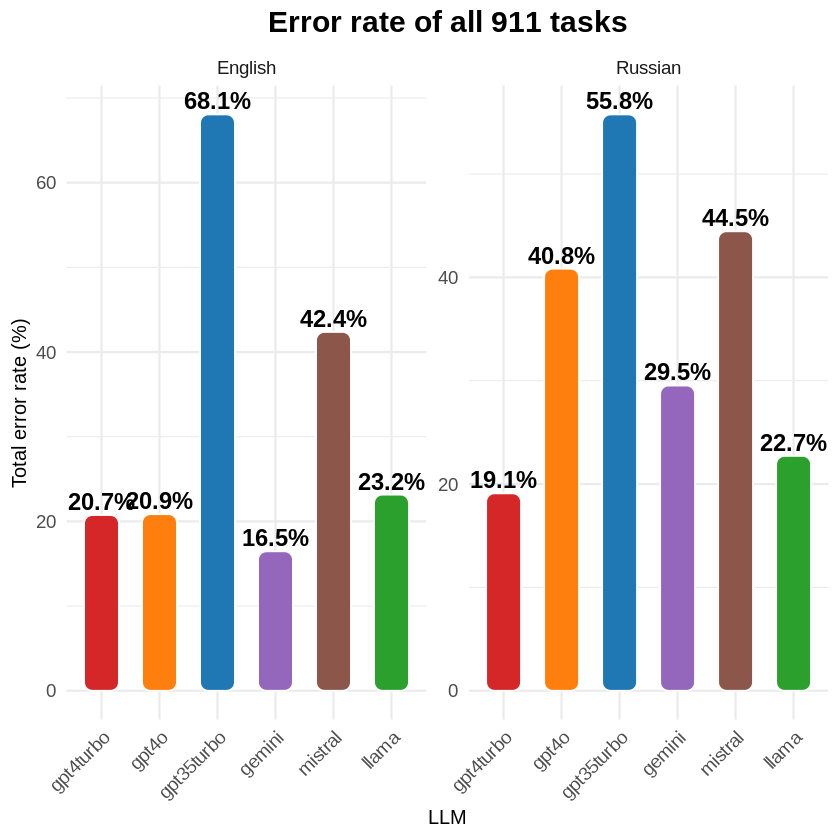

In [14]:
df_total <- df %>%
  group_by(Model, Language) %>%
  summarise(
    TotalErrors = sum(Errors),
    .groups = "drop"
  ) %>%
  mutate(GlobalPercent = (TotalErrors / 911) * 100)

p2 <- ggplot(df_total, aes(x = Model, y = GlobalPercent, fill = Model)) +
  geom_chicklet(
    width = 0.6,
    radius = grid::unit(5, "pt")
  ) +
  geom_text(aes(label = sprintf("%.1f%%", GlobalPercent)),
            vjust = -0.3, size = 5, fontface = "bold") +
  labs(title = "Error rate of all 911 tasks",
       x = "LLM",
       y = "Total error rate (%)") +
  scale_fill_manual(values = model_colors, guide = FALSE) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18),
    axis.title = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1)
  ) +
  facet_wrap(~Language, scales = "free_y")

print(p2)
ggsave("global_error_distribution.png", width = 10, height = 5, dpi = 300)